In [1]:
import torch

import quairkit as qkit
from quairkit import *
from quairkit.database.matrix import *
from quairkit.database.random import *
from quairkit.database.representation import *
from quairkit.qinfo import *

设置量子计算模拟的复数精度（默认 complex64 ，需要更高精度时用 complex128 ）

In [ ]:
qkit.set_dtype("complex128")
#
print("dtype: ",qkit.get_dtype())

dtype:  torch.complex128


量子门的核心性质满足unitarity  
UU†=U†U=I  
单比特门∣ψ⟩=α∣0⟩+β∣1⟩满足归一化$α^2+β^2=1$  
泡利矩阵是最基础的单比特门

In [3]:
X = torch.tensor([[0, 1], [1, 0]])  # Pauli X matrix
Y = torch.tensor([[0, -1j], [1j, 0]])  # Pauli Y matrix
Z = torch.tensor([[1, 0], [0, -1]])  # Pauli Z matrix

print("The matrix form of Pauli X gate is\n", X, "\n")
print("The matrix form of Pauli Y gate is\n", Y, "\n")
print("The matrix form of Pauli Z gate is\n", Z)

The matrix form of Pauli X gate is
 tensor([[0, 1],
        [1, 0]]) 

The matrix form of Pauli Y gate is
 tensor([[0.+0.j, -0.-1.j],
        [0.+1.j, 0.+0.j]]) 

The matrix form of Pauli Z gate is
 tensor([[ 1,  0],
        [ 0, -1]])


哈达玛门(H 门)：将计算基（$|0\rangle,|1\rangle$ ）转换为叠加态基（$|+\rangle,|-\rangle$ ），是产生量子叠加的核心门。  
相位门(S门)：对 $|1\rangle$ 态添加 i（$90^\circ$ ）的相位，不改变 $|0\rangle$ 态。   
T门（$\phi$门）：对 $|1\rangle$ 态添加 $e^{i\pi/4}$（ $45^\circ$ ）的相位，是构建高精度量子门的基础。

In [7]:
#手动构造相应的门
sqrt_2 = torch.sqrt(torch.tensor(2))  # sqrt 2
isq2 = 1 / sqrt_2  # 1 / sqrt 2
# pi = torch.acos(torch.zeros(1)).item() * 2 # pi


H = isq2 * torch.tensor([[1, 1], [1, -1]])  # Hadamard gate
S = torch.tensor([[1, 0], [0, 1j]])  # Phase gate
T = torch.tensor([[1, 0], [0, torch.exp(torch.tensor(1j * torch.pi / 4))]])  # T gate

print("The matrix form of Hadamard gate is\n", H)
print("\nThe matrix form of Phase gate is\n", S)
print("\nThe matrix form of T gate is\n", T)

The matrix form of Hadamard gate is
 tensor([[ 0.7071,  0.7071],
        [ 0.7071, -0.7071]])

The matrix form of Phase gate is
 tensor([[1.+0.j, 0.+0.j],
        [0.+0.j, 0.+1.j]])

The matrix form of T gate is
 tensor([[1.0000+0.0000j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.7071+0.7071j]])


↓ 内置哈达玛门，参数 0 表示作用于第 0 个 qubit（单比特门只需指定 qubit 索引）

In [5]:

H_qkit = h()  # built-in Hadamard gate

print("The matrix form of built in Hadamard gate is\n", H_qkit)

The matrix form of built in Hadamard gate is
 tensor([[ 0.7071+0.j,  0.7071+0.j],
        [ 0.7071+0.j, -0.7071+0.j]])


用 QuAIRKit 构造和使用单量子比特旋转门    
让量子比特绕对应轴旋转 $\theta$ 角度（量子态的 “旋转” 是量子计算中调控相位、叠加态的核心操作 ）  


In [ ]:
#生成旋转门的角度
theta = torch.round(2*torch.pi*torch.rand(1), decimals=3) # the parameter of Pauli rotation operators

#构造相应旋转门
Rx = rx(theta) # x-axis rotation gate
Ry = ry(theta) # y-axis rotation gate
Rz = rz(theta) # z-axis rotation gate

print(f'The matrix form of x-axis rotation gate with parameter {theta[0].numpy()} is\n{Rx}')
print(f'\nThe matrix form of y-axis rotation gate with parameter {theta[0].numpy()} is\n{Ry}')
print(f'\nThe matrix form of z-axis rotation gate with parameter {theta[0].numpy()} is\n{Rz}')

The matrix form of x-axis rotation gate with parameter 5.466 is
tensor([[-0.9177+0.0000j,  0.0000-0.3973j],
        [ 0.0000-0.3973j, -0.9177+0.0000j]])

The matrix form of y-axis rotation gate with parameter 5.466 is
tensor([[-0.9177+0.j, -0.3973+0.j],
        [ 0.3973+0.j, -0.9177+0.j]])

The matrix form of z-axis rotation gate with parameter 5.466 is
tensor([[-0.9177-0.3973j,  0.0000+0.0000j],
        [ 0.0000+0.0000j, -0.9177+0.3973j]])


三类核心双比特门（CNOT、CZ、SWAP ）  
量子计算的 “通用性” 依赖于 单量子比特门 + 至少一种双量子比特门。双比特门能创造量子纠缠（多比特关联），是实现复杂量子算法的基础。

CNOT 门   
若控制比特是 $|1\rangle$ → 翻转目标比特（$|0\rangle \leftrightarrow |1\rangle$ ）  
若控制比特是 $|0\rangle$ → 目标比特不变  

CZ门  
控制比特是 $|1\rangle$ 时，对目标比特添加 相位翻转（$|1\rangle \to -|1\rangle$ ，$|0\rangle$ 不变 ）。

SWAP门  
交换两个量子比特的状态（如把 $|ab\rangle$ 转成 $|ba\rangle$ ）

In [8]:
CNOT = cnot()  # controlled-NOT gate
CZ = cz()  # controlled-Z gate
SWAP = swap()  # swap gate

print("The matrix form of controlled-NOT gate is\n", CNOT, "\n")
print("The matrix form of controlled-Z gate is\n", CZ, "\n")
print("The matrix form of swap gate is\n", SWAP)

The matrix form of controlled-NOT gate is
 tensor([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]]) 

The matrix form of controlled-Z gate is
 tensor([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]]) 

The matrix form of swap gate is
 tensor([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])


量子门作用于量子态  
对于纯态，量子门（左乘）的作用是保证量子态的归一化不变    
对于混合态（密度矩阵ρ），量子门$σ=U ρ U^†$


In [9]:
## 生成纯态（rank=1）、混合态（rank=2）、幺正门
pure_state = random_state(num_qubits=1, rank=1) 
mixed_state = random_state(num_qubits=1, rank=2) 
unitary = random_unitary(num_qubits=1) 

# 用 evolve 让门作用于态
pure_state_evo = pure_state.evolve(unitary)
mixed_state_evo = mixed_state.evolve(unitary)
#结果 纯态用 ket 表示，混合态用密度矩阵表示
print(f"pure output state after applying a unitary:\n {pure_state_evo.ket}\n")
print(f"mixed output state after applying a unitary:\n {mixed_state_evo.density_matrix}")

pure output state after applying a unitary:
 tensor([[0.2583-0.7239j],
        [0.4740-0.4296j]])

mixed output state after applying a unitary:
 tensor([[ 0.1423-1.7347e-18j, -0.1056-6.5318e-02j],
        [-0.1056+6.5318e-02j,  0.8577+4.8572e-17j]])


单比特门作用于多量子比特态时，指定作用于哪个 qubit  
框架会将 U 与单位矩阵 I（另一个 qubit 不操作）做张量积,保证维度    

In [10]:

state = random_state(num_qubits=2)
unitary = random_unitary(num_qubits=1)

# 指定门作用于第 0 号 qubit
state_evo = state.evolve(unitary, sys_idx=[0])
print(f"state after applying a unitary on the first qubit:\n {state_evo.density_matrix}")

state after applying a unitary on the first qubit:
 tensor([[ 0.6083-9.5178e-18j, -0.0370+1.0392e-03j, -0.4426-1.7530e-01j,
          0.0895-4.7400e-02j],
        [-0.0370-1.0392e-03j,  0.0023+8.8642e-20j,  0.0266+1.1417e-02j,
         -0.0055+2.7298e-03j],
        [-0.4426+1.7530e-01j,  0.0266-1.1417e-02j,  0.3726+3.7480e-18j,
         -0.0515+6.0293e-02j],
        [ 0.0895+4.7400e-02j, -0.0055-2.7298e-03j, -0.0515-6.0293e-02j,
          0.0169+1.2180e-19j]])


批量态 + 批量门

In [ ]:
#五个单量子比特态+一个门
state = random_state(num_qubits=1, size=5) 
unitary = random_unitary(num_qubits=1)
state_evo = state.evolve(unitary)
# 等价循环
# batch_size = 5
# state_list = []
# unitary = random_unitary(num_qubits=1)
# for i in range(batch_size):
#     state_temp = random_state(num_qubits=1)
#     state_evo_temp = state_temp.evolve(unitary)
#     state_list.append(state_evo_temp.density_matrix)
# state_evo = to_state(torch.stack(state_list, dim=0))

print(f"batched states after applying a unitary:\n {state_evo}")
#输出 5 个单比特态应用 unitary 后的密度矩阵，
# 每个态对应一组结果

batched states after applying a unitary:
 
-----------------------------------------------------
 Backend: state_vector
 System dimension: [2]
 System sequence: [0]
 Batch size: [5]

 # 0:
[-0.1 +0.71j -0.16-0.68j]
 # 1:
[-0.73-0.17j -0.65-0.1j ]
 # 2:
[0.43+0.39j 0.78+0.26j]
 # 3:
[ 0.39+0.18j -0.54+0.73j]
 # 4:
[-0.7 -0.33j  0.44+0.45j]
-----------------------------------------------------



单个量子态 + 批量量子门  
原理同上

In [12]:

state = random_state(num_qubits=1)
unitary = random_unitary(num_qubits=1, size=5) # 5 random single-qubit unitaries (batched unitaries)
state_evo = state.evolve(unitary)
# this is equivalent to below code
# batch_size = 5
# state_list = []
# state = random_state(num_qubits=1)
# for i in range(batch_size):
#     unitary_temp = random_unitary(num_qubits=1)
#     state_evo_temp = state.evolve(unitary_temp)
#     state_list.append(state_evo_temp.density_matrix)
# state_evo = to_state(torch.stack(state_list, dim=0))

print(f"state after applying batched unitaries:\n {state_evo}")

state after applying batched unitaries:
 
-----------------------------------------------------
 Backend: density_matrix
 System dimension: [2]
 System sequence: [0]
 Batch size: [5]

 # 0:
[[0.53-0.j   0.11+0.44j]
 [0.11-0.44j 0.47+0.j  ]]
 # 1:
[[ 0.92+0.j   -0.09+0.14j]
 [-0.09-0.14j  0.08+0.j  ]]
 # 2:
[[ 0.68+0.j   -0.42-0.01j]
 [-0.42+0.01j  0.32-0.j  ]]
 # 3:
[[0.75+0.j   0.19-0.33j]
 [0.19+0.33j 0.25+0.j  ]]
 # 4:
[[0.45+0.j   0.42+0.18j]
 [0.42-0.18j 0.55-0.j  ]]
-----------------------------------------------------



构建并可视化一个 2 比特量子电路（Quantum Circuit）

the diagram of the quantum circuit:


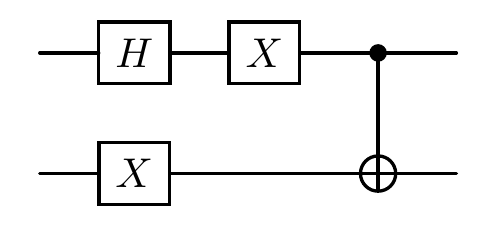

In [ ]:
num_qubits = 2  

cir = Circuit(num_qubits)  
cir.h(0)  # Add Hadamard gate to qubit 0
cir.x([0, 1])  # Add X gate to qubit 0 and 1
cir.cx([0, 1])  # Add CNOT gate to qubit 0 and 1

print("the diagram of the quantum circuit:")
cir.plot()

将量子电路作用于一个量子态并获取电路执行后的输出态

In [14]:
state = random_state(num_qubits=2)
output_state = cir(state)  # run the circuit on a state

print(f"output state after applying a quantum circuit:\n {output_state}")

output state after applying a quantum circuit:
 
-----------------------------------------------------
 Backend: density_matrix
 System dimension: [2, 2]
 System sequence: [0, 1]
[[ 0.37+0.j   -0.28+0.13j -0.1 +0.j   -0.09-0.04j]
 [-0.28-0.13j  0.42+0.j    0.03+0.09j  0.16-0.03j]
 [-0.1 -0.j    0.03-0.09j  0.06+0.j   -0.04+0.j  ]
 [-0.09+0.04j  0.16+0.03j -0.04-0.j    0.14+0.j  ]]
-----------------------------------------------------



多个初始量子态（批量态）通过同一个量子电路，并高效获取所有输出态  
并行，更高效  

In [16]:
#生成 5 个独立的 2 比特量子态
state = random_state(num_qubits=2, size=5)  
#让批量态通过同一个电路
output_state = cir(state)  
# 等价循环
# batch_size = 5
# state_list = []
# for i in range(batch_size):
#     state = random_state(num_qubits=2)
#     output_state_temp = cir(state)
#     state_list.append(output_state_temp.density_matrix)
#     print(output_state_temp)
# output_states = to_state(torch.stack(state_list, dim=0))

print(f"output batched states after applying a quantum circuit:\n {output_state}")

output batched states after applying a quantum circuit:
 
-----------------------------------------------------
 Backend: density_matrix
 System dimension: [2, 2]
 System sequence: [0, 1]
 Batch size: [5]

 # 0:
[[ 0.14+0.j   -0.13+0.11j -0.03-0.05j -0.08+0.11j]
 [-0.13-0.11j  0.49+0.j   -0.18+0.07j  0.22-0.1j ]
 [-0.03+0.05j -0.18-0.07j  0.19+0.j   -0.04+0.02j]
 [-0.08-0.11j  0.22+0.1j  -0.04-0.02j  0.18+0.j  ]]
 # 1:
[[ 0.24+0.j   -0.  +0.14j  0.07+0.04j  0.08-0.17j]
 [-0.  -0.14j  0.32+0.j    0.09+0.07j -0.07-0.17j]
 [ 0.07-0.04j  0.09-0.07j  0.16+0.j   -0.04-0.17j]
 [ 0.08+0.17j -0.07+0.17j -0.04+0.17j  0.28+0.j  ]]
 # 2:
[[ 0.32+0.j    0.09-0.11j -0.16-0.04j -0.02-0.09j]
 [ 0.09+0.11j  0.18+0.j   -0.13-0.13j -0.02-0.04j]
 [-0.16+0.04j -0.13+0.13j  0.42+0.j    0.01-0.05j]
 [-0.02+0.09j -0.02+0.04j  0.01+0.05j  0.08+0.j  ]]
 # 3:
[[ 0.41+0.j   -0.02-0.07j -0.03+0.06j -0.08+0.03j]
 [-0.02+0.07j  0.11+0.j    0.01+0.02j -0.02-0.01j]
 [-0.03-0.06j  0.01-0.02j  0.46+0.j    0.05+0.02j]
 [

### 量子信道

三种数学表示（Kraus、Choi、Stinespring）

In [18]:
# 生成一个单比特量子信道的 Kraus 表示
kraus_repr = random_channel(num_qubits=1, target="kraus")

# Kraus 表示 → Choi 表示
# 原理通过最大纠缠态构造 Choi 态
choi_repr = channel_repr_convert(kraus_repr, source="kraus", target="choi")

#  Kraus 表示 → Stinespring 表示
# 原理通过 Kraus 算子构造等距变换 V
stin_repr = channel_repr_convert(kraus_repr, source="kraus", target="stinespring")


print(f"Kraus representation of a quantum channel:\n {kraus_repr}\n")
print(f"Choi representation of the same quantum channel:\n {choi_repr}\n")
print(f"Stinespring representation of the same quantum channel:\n {stin_repr}\n")

Kraus representation of a quantum channel:
 tensor([[[ 0.4670+0.8585j, -0.1506-0.1231j],
         [-0.0284+0.0917j,  0.1205+0.1535j]],

        [[ 0.0153+0.0589j, -0.0346+0.1020j],
         [ 0.0466-0.1725j, -0.0909-0.9509j]]])

Choi representation of the same quantum channel:
 tensor([[ 0.9588+0.0000j,  0.0560-0.0618j, -0.1705-0.0754j,  0.1307+0.0410j],
        [ 0.0560+0.0618j,  0.0412+0.0000j, -0.0262-0.0161j,  0.1705+0.0754j],
        [-0.1705+0.0754j, -0.0262+0.0161j,  0.0494+0.0000j, -0.1309-0.0339j],
        [ 0.1307-0.0410j,  0.1705-0.0754j, -0.1309+0.0339j,  0.9506+0.0000j]])

Stinespring representation of the same quantum channel:
 tensor([[ 0.4670+0.8585j, -0.1506-0.1231j],
        [ 0.0153+0.0589j, -0.0346+0.1020j],
        [-0.0284+0.0917j,  0.1205+0.1535j],
        [ 0.0466-0.1725j, -0.0909-0.9509j]])



比特翻转信道（Bit flip channel）

以概率 $1-p$ 翻转量子比特的态（$|0\rangle \leftrightarrow |1\rangle$ ），以概率 p 保持态不变。

In [ ]:
probs = 0.5 # probability
bit_flip_kraus_repr = bit_flip_kraus(probs) 
# Kraus → Choi、Stinespring 转换
bit_flip_choi_repr = channel_repr_convert(bit_flip_kraus_repr, source="kraus", target="choi") # Choi representation
bit_flip_stin_repr = channel_repr_convert(bit_flip_kraus_repr, source="kraus", target="stinespring") # Stinespring representation

print(f"Kraus representation of a bit flip channel with probability {probs}:\n {bit_flip_kraus_repr}\n")
print(f"Choi representation of a bit flip channel with probability {probs}:\n {bit_flip_choi_repr}\n")
print(f"Stinespring representation of a bit flip channel with probability {probs}:\n {bit_flip_stin_repr}")

Kraus representation of a bit flip channel with probability 0.5:
 tensor([[[0.7071+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.7071+0.j]],

        [[0.0000+0.j, 0.7071+0.j],
         [0.7071+0.j, 0.0000+0.j]]])

Choi representation of a bit flip channel with probability 0.5:
 tensor([[0.5000+0.j, 0.0000+0.j, 0.0000+0.j, 0.5000+0.j],
        [0.0000+0.j, 0.5000+0.j, 0.5000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.5000+0.j, 0.5000+0.j, 0.0000+0.j],
        [0.5000+0.j, 0.0000+0.j, 0.0000+0.j, 0.5000+0.j]])

Stinespring representation of a bit flip channel with probability 0.5:
 tensor([[0.7071+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.7071+0.j],
        [0.0000+0.j, 0.7071+0.j],
        [0.7071+0.j, 0.0000+0.j]])


Phase flip channel相位翻转信道  
以概率 $1-p$ 翻转量子比特的相位符号（$|0\rangle$ 不变，$|1\rangle \to -|1\rangle$ ）  
以概率 p 保持量子比特不变  

In [20]:
probs = 0.5 # probability
phase_flip_kraus_repr = phase_flip_kraus(probs) # Kraus representation
phase_flip_choi_repr = channel_repr_convert(phase_flip_kraus_repr, source="kraus", target="choi") # Choi representation
phase_flip_stin_repr = channel_repr_convert(phase_flip_kraus_repr, source="kraus", target="stinespring") # Stinespring representation

print(f"Kraus representation of a phase flip channel with probability {probs}:\n {phase_flip_kraus_repr}\n")
print(f"Choi representation of a phase flip channel with probability {probs}:\n {phase_flip_choi_repr}\n")
print(f"Stinespring representation of a phase flip channel with probability {probs}:\n {phase_flip_stin_repr}")

Kraus representation of a phase flip channel with probability 0.5:
 tensor([[[ 0.7071+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.7071+0.j]],

        [[ 0.7071+0.j,  0.0000+0.j],
         [ 0.0000+0.j, -0.7071+0.j]]])

Choi representation of a phase flip channel with probability 0.5:
 tensor([[1.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 1.0000+0.j]])

Stinespring representation of a phase flip channel with probability 0.5:
 tensor([[ 0.7071+0.j,  0.0000+0.j],
        [ 0.7071+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  0.7071+0.j],
        [ 0.0000+0.j, -0.7071+0.j]])


Bit-phase flip channel 比特 - 相位翻转信道    
比特翻转（Bit flip）+ 相位翻转（Phase flip） 的组合噪声模型    
以概率 $1-p$ 同时翻转量子比特的态（|0⟩↔|1⟩）和相位（|1⟩→-|1⟩）  
以概率 p 保持量子比特不变  
其 Kraus 算子 利用 Pauli-Y 门（$Y = iXZ$ ）定义

In [21]:
probs = 0.5 # probability
bit_phase_flip_kraus_repr = bit_phase_flip_kraus(probs) # Kraus representation
bit_phase_flip_choi_repr = channel_repr_convert(bit_phase_flip_kraus_repr, source="kraus", target="choi") # Choi representation
bit_phase_flip_stin_repr = channel_repr_convert(bit_phase_flip_kraus_repr, source="kraus", target="stinespring") # Stinespring representation

print(f"Kraus representation of a bit-phase flip channel with probability {probs}:\n {bit_phase_flip_kraus_repr}\n")
print(f"Choi representation of a bit-phase flip channel with probability {probs}:\n {bit_phase_flip_choi_repr}\n")
print(f"Stinespring representation of a bit-phase flip channel with probability {probs}:\n {bit_phase_flip_stin_repr}")

Kraus representation of a bit-phase flip channel with probability 0.5:
 tensor([[[0.7071+0.0000j, 0.0000+0.0000j],
         [0.0000+0.0000j, 0.7071+0.0000j]],

        [[0.0000+0.0000j, 0.0000-0.7071j],
         [0.0000+0.7071j, 0.0000+0.0000j]]])

Choi representation of a bit-phase flip channel with probability 0.5:
 tensor([[ 0.5000+0.j,  0.0000+0.j,  0.0000+0.j,  0.5000+0.j],
        [ 0.0000+0.j,  0.5000+0.j, -0.5000+0.j,  0.0000+0.j],
        [ 0.0000+0.j, -0.5000+0.j,  0.5000+0.j,  0.0000+0.j],
        [ 0.5000+0.j,  0.0000+0.j,  0.0000+0.j,  0.5000+0.j]])

Stinespring representation of a bit-phase flip channel with probability 0.5:
 tensor([[0.7071+0.0000j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.0000-0.7071j],
        [0.0000+0.0000j, 0.7071+0.0000j],
        [0.0000+0.7071j, 0.0000+0.0000j]])


Depolarizing channel 退极化信道  
以概率 $p$ 让量子比特退化为 完全混合态（$I/2$，最大程度丢失信息 ）  
以概率 $1-p$ 让量子比特保持不变  
$ε(ρ)= (pI)/2+(1−p)ρ$  
退极化信道的 Kraus 算子 有 4 个（因单比特信道的 Kraus 算子最多 4 个 ）：$\{ \sqrt{1 - 3p/4}I,\ \sqrt{p/4}X,\ \sqrt{p/4}Y,\ \sqrt{p/4}Z \}$

In [ ]:
probs = 0.5 # probability
depolarizing_kraus_repr = depolarizing_kraus(probs) 
# ↑输出是 4 个 2×2 复矩阵（对应 4 个 Kraus 算子 ）
depolarizing_choi_repr = channel_repr_convert(depolarizing_kraus_repr, source="kraus", target="choi") # Choi representation
depolarizing_stin_repr = channel_repr_convert(depolarizing_kraus_repr, source="kraus", target="stinespring") # Stinespring representation

print(f"Kraus representation of a depolarizing channel with probability {probs}:\n {depolarizing_kraus_repr}\n")
print(f"Choi representation of a depolarizing channel with probability {probs}:\n {depolarizing_choi_repr}\n")
print(f"Stinespring representation of a depolarizing channel with probability {probs}:\n {depolarizing_stin_repr}")

Kraus representation of a depolarizing channel with probability 0.5:
 tensor([[[ 0.7906+0.0000j,  0.0000+0.0000j],
         [ 0.0000+0.0000j,  0.7906+0.0000j]],

        [[ 0.0000+0.0000j,  0.3536+0.0000j],
         [ 0.3536+0.0000j,  0.0000+0.0000j]],

        [[ 0.0000+0.0000j,  0.0000-0.3536j],
         [ 0.0000+0.3536j,  0.0000+0.0000j]],

        [[ 0.3536+0.0000j,  0.0000+0.0000j],
         [ 0.0000+0.0000j, -0.3536+0.0000j]]])

Choi representation of a depolarizing channel with probability 0.5:
 tensor([[0.7500+0.j, 0.0000+0.j, 0.0000+0.j, 0.5000+0.j],
        [0.0000+0.j, 0.2500+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.2500+0.j, 0.0000+0.j],
        [0.5000+0.j, 0.0000+0.j, 0.0000+0.j, 0.7500+0.j]])

Stinespring representation of a depolarizing channel with probability 0.5:
 tensor([[ 0.7906+0.0000j,  0.0000+0.0000j],
        [ 0.0000+0.0000j,  0.3536+0.0000j],
        [ 0.0000+0.0000j,  0.0000-0.3536j],
        [ 0.3536+0.0000j,  0.0000+0.0000j],
      

Amplitude damping channel振幅阻尼信道    
量子开放系统中最典型的噪声模型之一    
模拟量子比特的 “能量衰减”（如量子比特从激发态 $|1\rangle$ 弛豫到基态 $|0\rangle$ ，振幅逐渐衰减 ）  
$K_0=∣0⟩⟨0∣+\sqrt{1−γ} ∣1⟩⟨1∣,K_1 = \sqrt{γ}∣0⟩⟨1∣$  
γ是衰减参数  
 

$\newline
\newline$
模拟量子比特与环境的相互作用（如超导 qubit 弛豫到基态、光子在光纤中丢失 ）。  
输入态 $|1\rangle$ 的振幅会以概率 $\gamma$ 衰减为 $|0\rangle$ ，导致量子相干性丢失。

In [24]:
gamma = 0.5 #衰减参数
amplitude_damping_kraus_repr = amplitude_damping_kraus(gamma) # Kraus representation
amplitude_damping_choi_repr = channel_repr_convert(amplitude_damping_kraus_repr, source="kraus", target="choi") # Choi representation
amplitude_damping_stin_repr = channel_repr_convert(amplitude_damping_kraus_repr, source="kraus", target="stinespring") # Stinespring representation

print(f"Kraus representation of a amplitude damping channel with parameter {gamma}:\n {amplitude_damping_kraus_repr}\n")
print(f"Choi representation of a amplitude damping channel with parameter {gamma}:\n {amplitude_damping_choi_repr}\n")
print(f"Stinespring representation of a amplitude damping channel with parameter {gamma}:\n {amplitude_damping_stin_repr}")

Kraus representation of a amplitude damping channel with parameter 0.5:
 tensor([[[1.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.7071+0.j]],

        [[0.0000+0.j, 0.7071+0.j],
         [0.0000+0.j, 0.0000+0.j]]])

Choi representation of a amplitude damping channel with parameter 0.5:
 tensor([[1.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.7071+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.5000+0.j, 0.0000+0.j],
        [0.7071+0.j, 0.0000+0.j, 0.0000+0.j, 0.5000+0.j]])

Stinespring representation of a amplitude damping channel with parameter 0.5:
 tensor([[1.0000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.7071+0.j],
        [0.0000+0.j, 0.7071+0.j],
        [0.0000+0.j, 0.0000+0.j]])


量子信道作用于量子态

In [25]:
state = random_state(num_qubits=1)
#↑↑将量子信道（Kraus 或 Choi 表示）作用于 State 对象，
# 得到演化后的量子态。
kraus_repr = random_channel(num_qubits=1, target="kraus") # random single-qubit quantum channel (Kraus representation)
choi_repr = channel_repr_convert(kraus_repr, source="kraus", target="choi") # Choi representation

state_kraus = state.transform(kraus_repr, repr_type="kraus")
state_choi = state.transform(choi_repr, repr_type="choi")

print(f"state after applying a quantum channel in Kraus representation:\n {state_kraus.density_matrix}\n")
print(f"state after applying a quantum channel in Choi representation:\n {state_choi.density_matrix}")

state after applying a quantum channel in Kraus representation:
 tensor([[0.3960-6.9389e-18j, 0.1722+1.6675e-01j],
        [0.1722-1.6675e-01j, 0.6040+0.0000e+00j]])

state after applying a quantum channel in Choi representation:
 tensor([[0.3960+0.0000j, 0.1722+0.1668j],
        [0.1722-0.1668j, 0.6040+0.0000j]])


↓单比特态 + 单比特信道

In [26]:
state = random_state(num_qubits=2)
kraus_repr = random_channel(num_qubits=1, target="kraus")

state_trans = state.transform(kraus_repr, sys_idx=[0])
print(f"state after applying a quantum channel on the first qubit:\n {state_trans.density_matrix}")

state after applying a quantum channel on the first qubit:
 tensor([[ 0.2576-1.3878e-17j, -0.0169+1.4430e-01j,  0.2270-1.0859e-01j,
         -0.0381+1.8022e-01j],
        [-0.0169-1.4430e-01j,  0.1243-8.6736e-19j, -0.1346-1.1855e-01j,
          0.1242-6.9828e-02j],
        [ 0.2270+1.0859e-01j, -0.1346+1.1855e-01j,  0.3275-4.3368e-18j,
         -0.1411+2.5225e-01j],
        [-0.0381-1.8022e-01j,  0.1242+6.9828e-02j, -0.1411-2.5225e-01j,
          0.2906-3.4694e-18j]])


批量量子态通过量子信道的并行演化

In [27]:
state = random_state(num_qubits=1, size=5) 
#生成 5 个 1 比特随机态（批量态）
kraus_repr = random_channel(num_qubits=1, target="kraus")
#让批量态通过同一个量子信道
state_trans = state.transform(kraus_repr, repr_type="kraus")
# this is equivalent to below code
# batch_size = 5
# state_list = []
# kraus_repr = random_channel(num_qubits=1, target="kraus")
# for i in range(batch_size):
#     state_temp = random_state(num_qubits=1)
#     state_trans_temp = state_temp.transform(kraus_repr, repr_type="kraus")
#     state_list.append(state_trans_temp.density_matrix)
# state_trans = to_state(torch.stack(state_list, dim=0))

print(f"batched states after applying a quantum channel:\n {state_evo}")

batched states after applying a quantum channel:
 
-----------------------------------------------------
 Backend: density_matrix
 System dimension: [2]
 System sequence: [0]
 Batch size: [5]

 # 0:
[[0.53-0.j   0.11+0.44j]
 [0.11-0.44j 0.47+0.j  ]]
 # 1:
[[ 0.92+0.j   -0.09+0.14j]
 [-0.09-0.14j  0.08+0.j  ]]
 # 2:
[[ 0.68+0.j   -0.42-0.01j]
 [-0.42+0.01j  0.32-0.j  ]]
 # 3:
[[0.75+0.j   0.19-0.33j]
 [0.19+0.33j 0.25+0.j  ]]
 # 4:
[[0.45+0.j   0.42+0.18j]
 [0.42-0.18j 0.55-0.j  ]]
-----------------------------------------------------

